Importando as bilbliotecas básicas e carregando o dataset

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Carregamento e Visão Geral dos Dados

In [108]:
data = pd.read_csv("../data/train.csv")

In [109]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 2. Análise de Valores Ausentes

In [111]:
data = data.drop('Cabin', axis=1)
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Embarked     712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.8+ KB


### 3. Análise Descritiva

In [112]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [113]:
features_num = data.select_dtypes(include=np.number).columns.tolist()
features_num.remove('PassengerId')

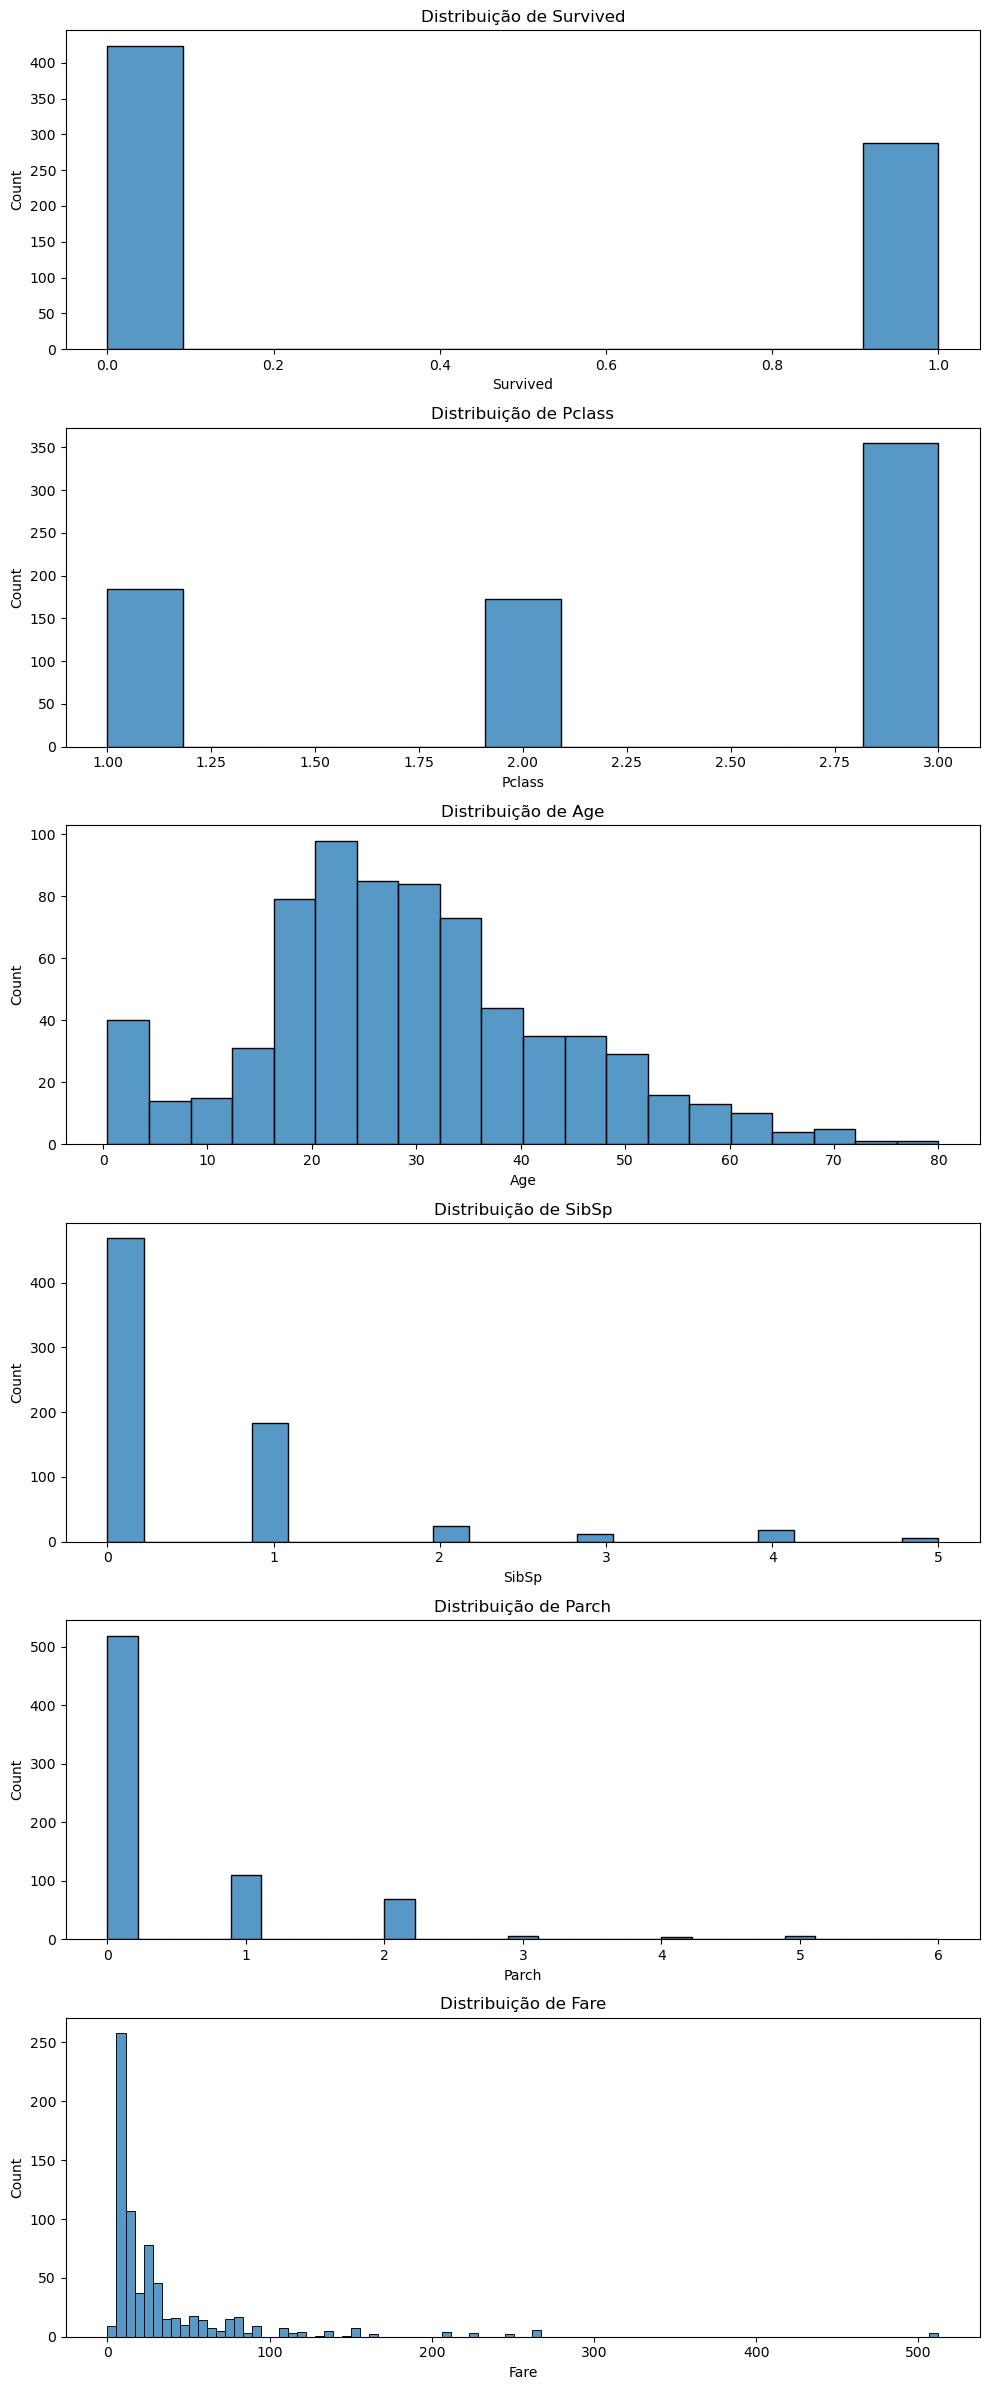

In [114]:
plt.figure(figsize=(10, len(features_num) * 4))
for feature in features_num:
    plt.subplot(len(features_num), 1, features_num.index(feature) + 1)
    sns.histplot(data[feature])
    plt.title(f'Distribuição de {feature}')
    plt.tight_layout()

plt.show()

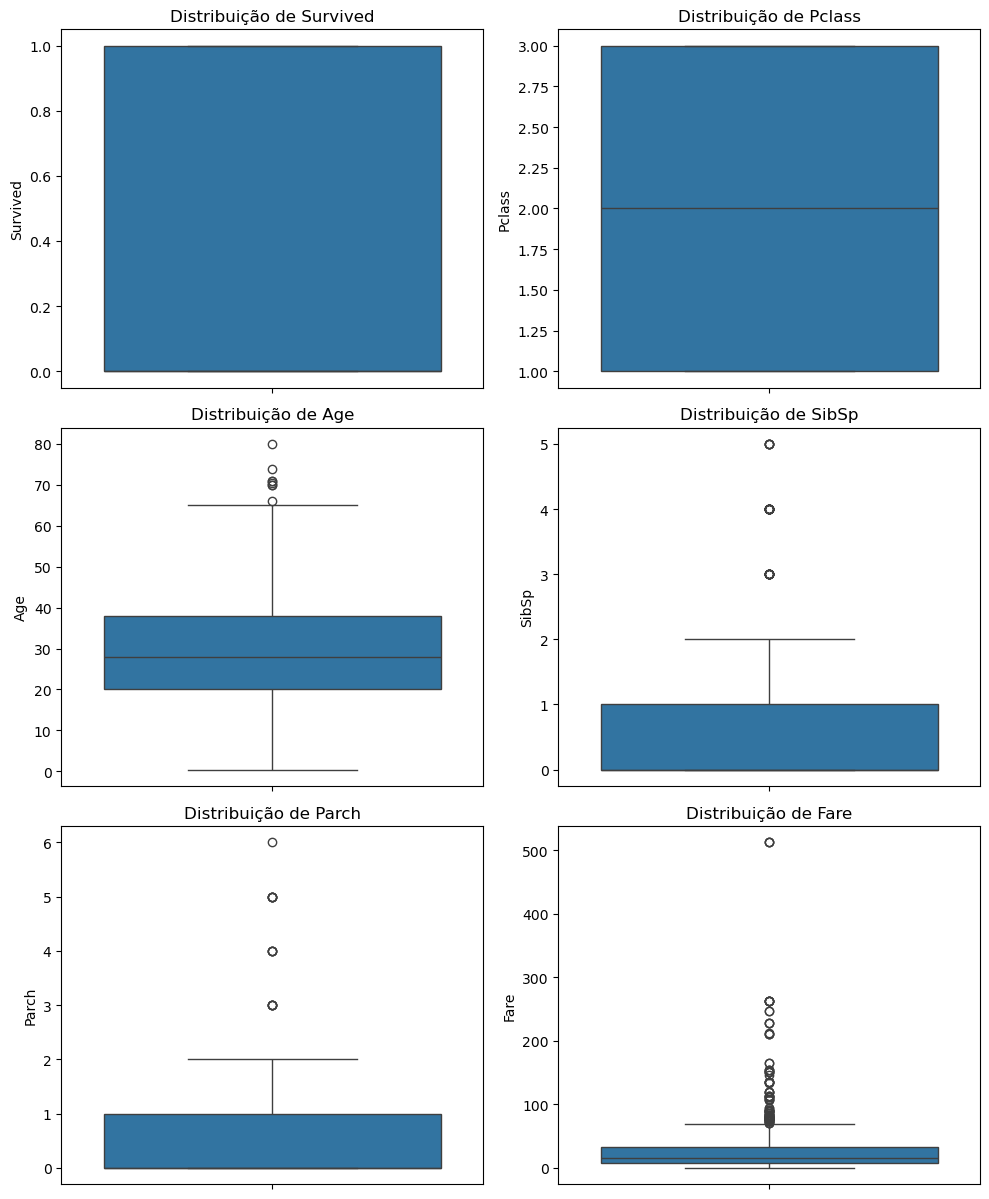

In [115]:
plt.figure(figsize=(10, len(features_num) * 4))
for feature in features_num:
    plt.subplot(len(features_num), 2, features_num.index(feature) + 1)
    sns.boxplot(data[feature])
    plt.title(f'Distribuição de {feature}')
    
    plt.tight_layout()

plt.show()

In [116]:
def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers


In [117]:
for feature in features_num:
    outliers = detect_outliers_iqr(data, feature)
    print(f'Feature: {feature}, Número de outliers: {len(outliers)}, Outliers: {outliers[feature].unique()}')

Feature: Survived, Número de outliers: 0, Outliers: []
Feature: Pclass, Número de outliers: 0, Outliers: []
Feature: Age, Número de outliers: 8, Outliers: [66.  71.  70.5 80.  70.  74. ]
Feature: SibSp, Número de outliers: 35, Outliers: [3 4 5]
Feature: Parch, Número de outliers: 15, Outliers: [5 3 4 6]
Feature: Fare, Número de outliers: 95, Outliers: [ 71.2833 263.      82.1708  76.7292  83.475   73.5     77.2875 247.5208
  79.2    146.5208 113.275   76.2917  90.      86.5    512.3292  79.65
 153.4625 135.6333  77.9583  78.85    91.0792 151.55   108.9     83.1583
 262.375  164.8667 134.5     75.25   211.5    227.525  120.      81.8583
  89.1042  78.2667  93.5    106.425   71.     110.8833 133.65   211.3375]


### 4. Análise Univariada


In [118]:
features = data.columns.tolist()
features.remove('PassengerId')
features.remove('Survived')


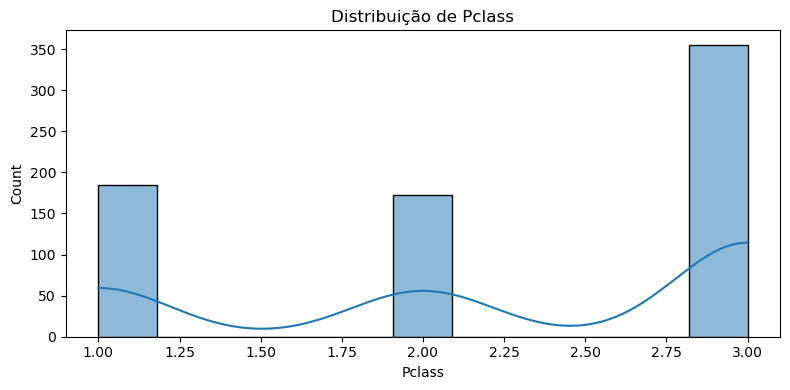

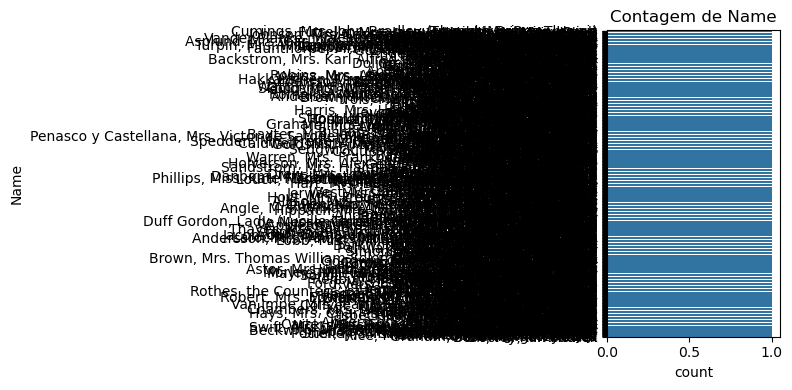

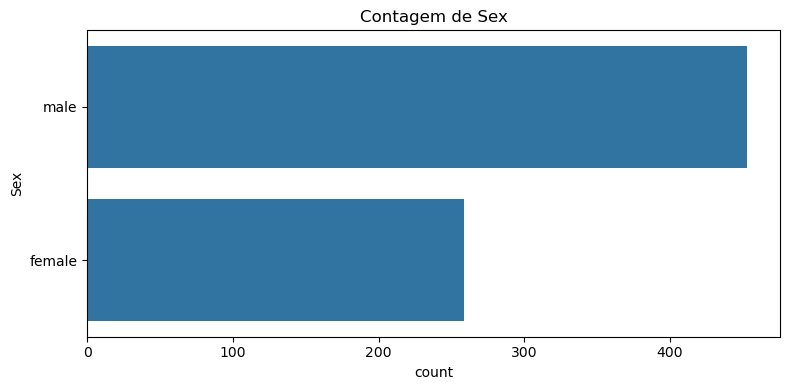

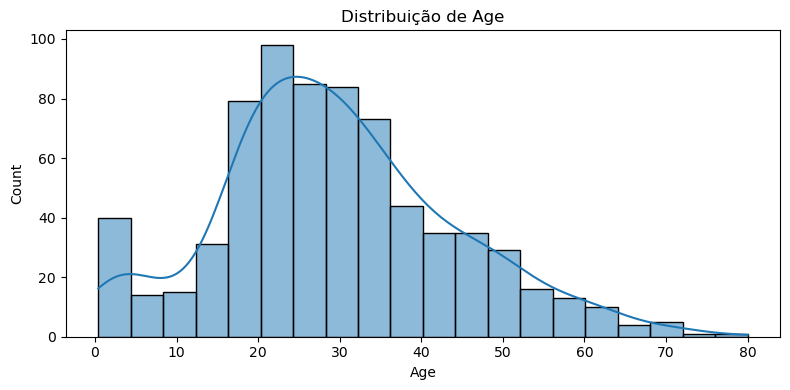

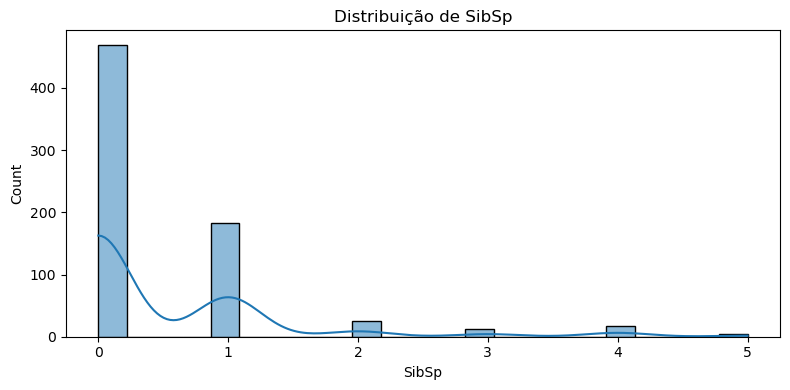

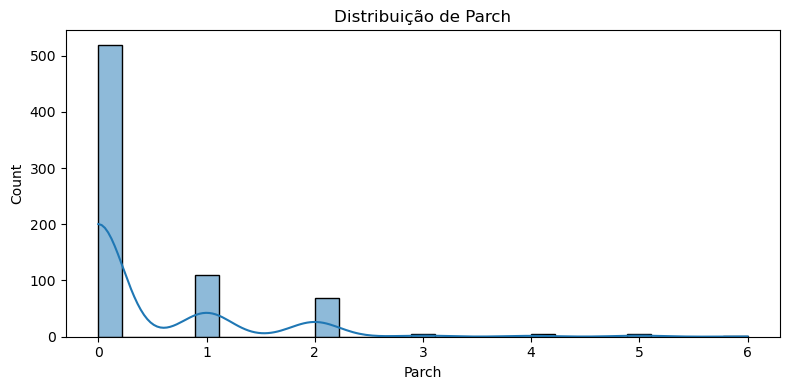

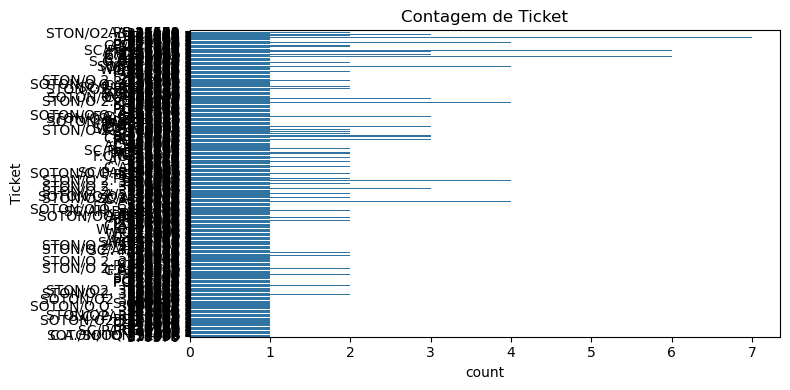

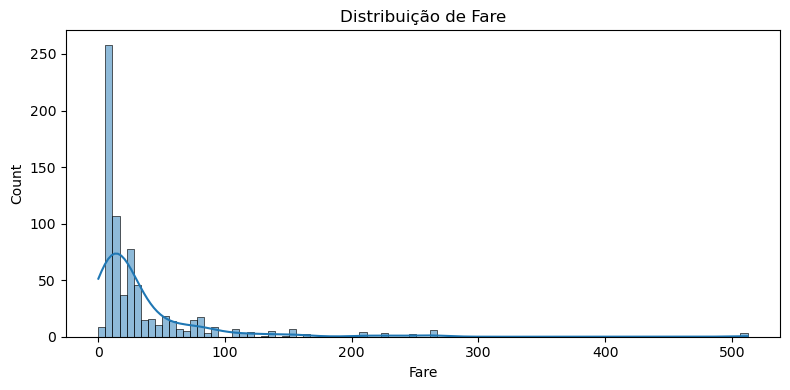

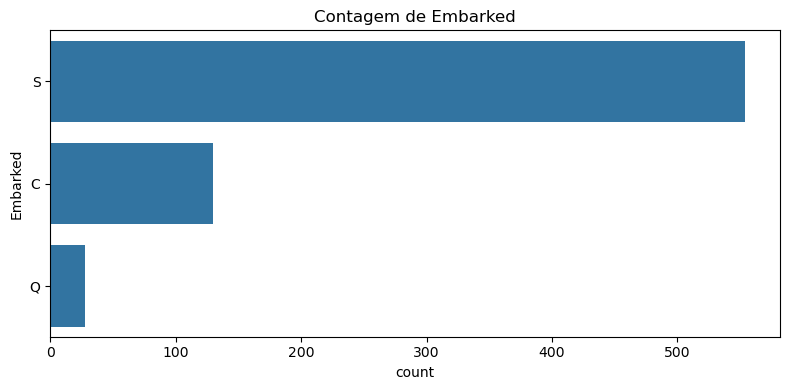

In [119]:
#Analise univariate
for feature in features:
    plt.figure(figsize=(8, 4))
    if data[feature].dtype == 'object':
        sns.countplot(data[feature])
        plt.title(f'Contagem de {feature}')
    else:
        sns.histplot(data[feature], kde=True)
        plt.title(f'Distribuição de {feature}')
    plt.tight_layout()
    plt.show()

### 5. Análise Bivariada


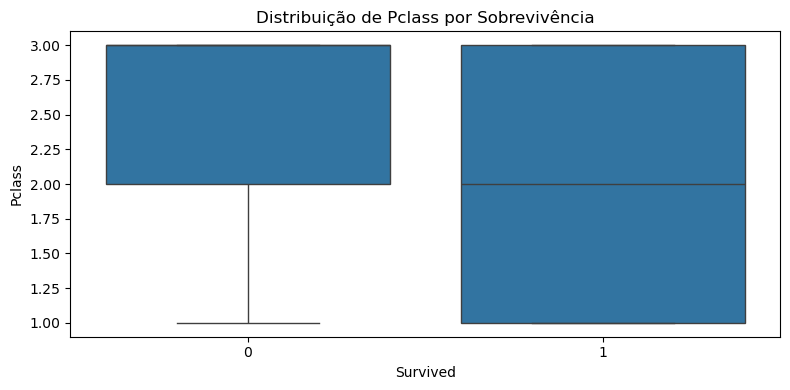

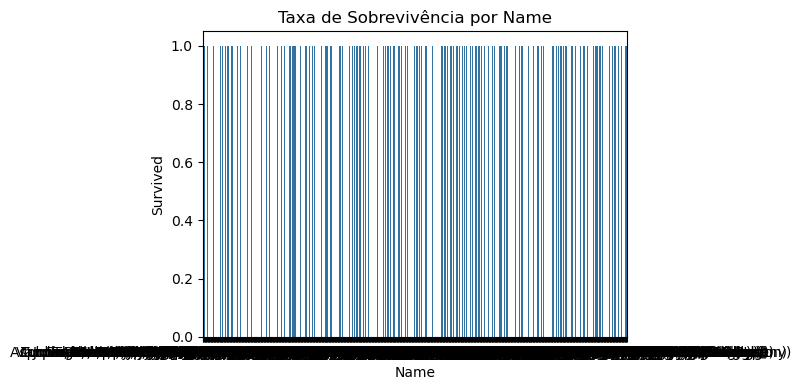

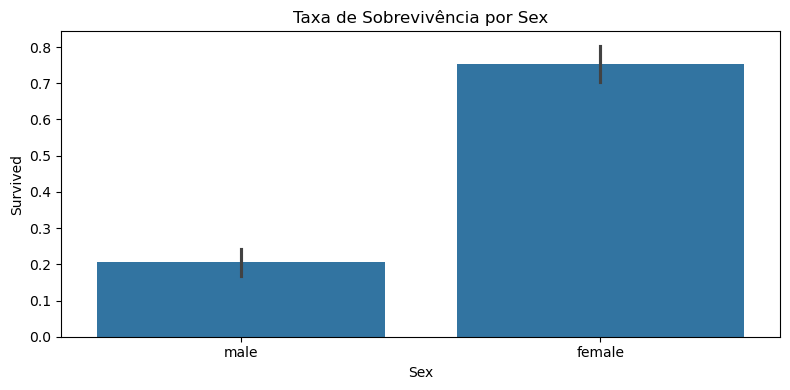

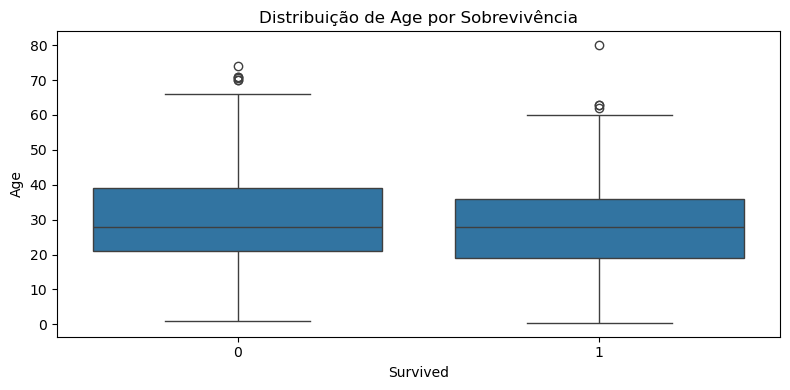

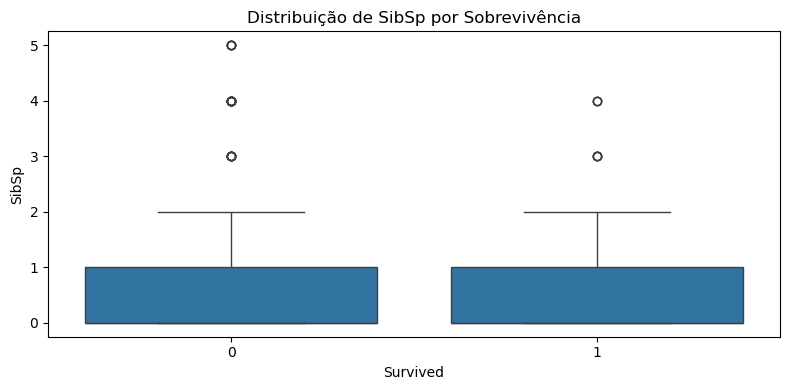

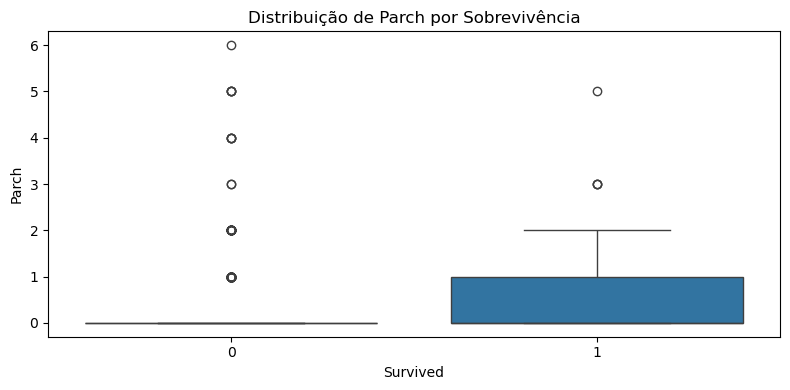

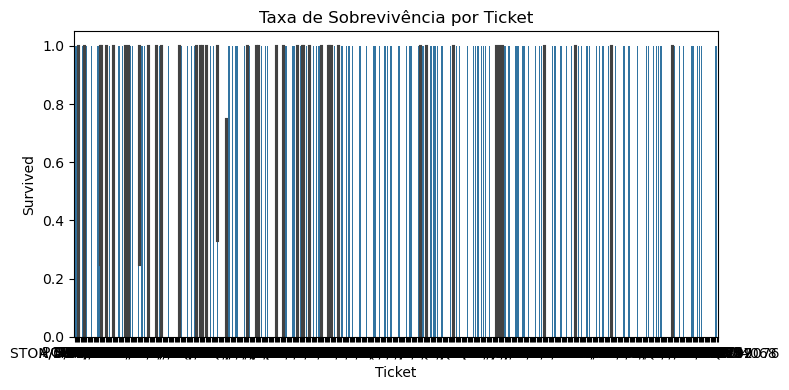

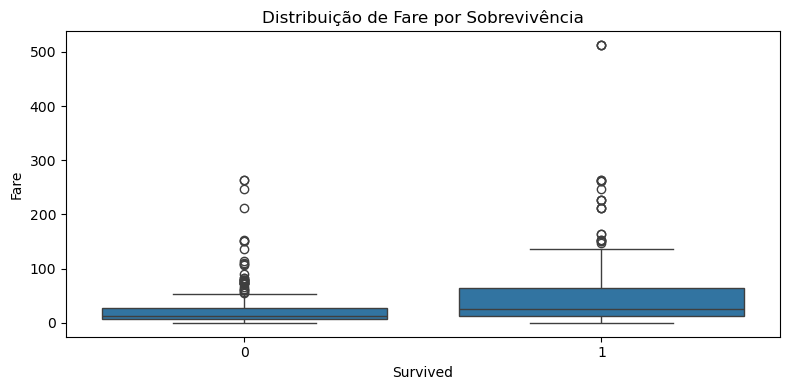

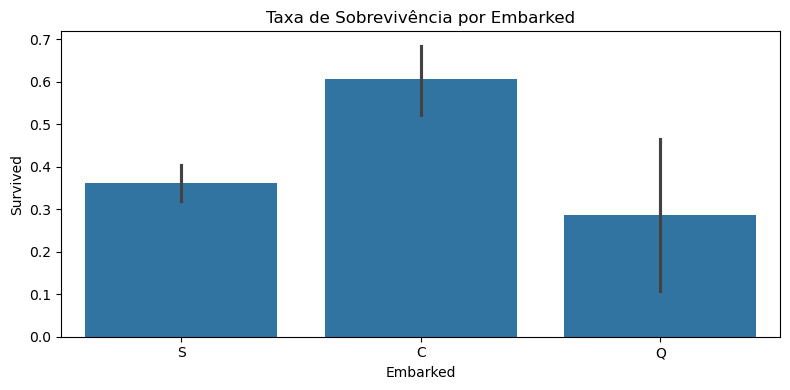

In [120]:
#Relação entre variáveis e a taxa de sobrevivência
for feature in features:
    plt.figure(figsize=(8, 4))
    if data[feature].dtype == 'object':
        sns.barplot(x=feature, y='Survived', data=data)
        plt.title(f'Taxa de Sobrevivência por {feature}')
    else:
        sns.boxplot(x='Survived', y=feature, data=data)
        plt.title(f'Distribuição de {feature} por Sobrevivência')
    plt.tight_layout()
    plt.show()

In [121]:
data[features_num].corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,-0.015523,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.139860,0.206624,1.000000


<Axes: >

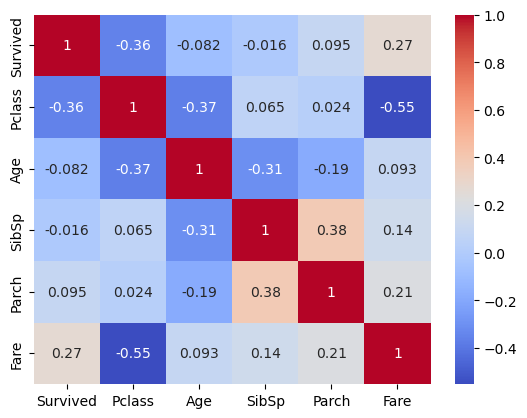

In [122]:
sns.heatmap(data[features_num].corr(), cmap='coolwarm', annot=True)

In [123]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [124]:
survival_rates = data[features_num].groupby('Survived').mean()
survival_rates



,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.485849,30.626179,0.525943,0.365566,22.965456
1,1.878472,28.193299,0.496528,0.531250,51.647672


In [125]:
#Criar novas variáveis SibSP e Parch aplicando a função detect_outliers_iqr para determinar outliers

if 'SibSp' in features:
    sibsp_outliers = detect_outliers_iqr(data, 'SibSp')
    data['SibSp_Outlier'] = data['SibSp'].apply(lambda x: 1 if x in sibsp_outliers['SibSp'].values else 0)
if 'Parch' in features:
    parch_outliers = detect_outliers_iqr(data, 'Parch')
    data['Parch_Outlier'] = data['Parch'].apply(lambda x: 1 if x in parch_outliers['Parch'].values else 0)


data.head()   


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,SibSp_Outlier,Parch_Outlier
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0


In [126]:
#Criar novas variáveis para Sex e Embarked usando one-hot encoding
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], dtype=int)
data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,SibSp_Outlier,Parch_Outlier,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,0,0,1,0,0,1


In [127]:
#Criar novas variáveis para agrupar passageiros por faixa etária em português
data['Age_Group'] = pd.cut(data['Age'], bins=[0, 12, 20, 35, 60, 80], labels=['Criança', 'Adolescente', 'Adulto Jovem', 'Adulto', 'Idoso'])
data = pd.get_dummies(data, columns=['Age_Group'], dtype=int)
data.head()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,SibSp_Outlier,...,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_Group_Criança,Age_Group_Adolescente,Age_Group_Adulto Jovem,Age_Group_Adulto,Age_Group_Idoso
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,...,0,1,0,0,1,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,...,1,0,1,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,...,1,0,0,0,1,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,...,1,0,0,0,1,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,...,0,1,0,0,1,0,0,1,0,0


In [128]:
features_num = data.select_dtypes(include=np.number).columns.tolist()
features_num

['PassengerId',
 'Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'SibSp_Outlier',
 'Parch_Outlier',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Age_Group_Criança',
 'Age_Group_Adolescente',
 'Age_Group_Adulto Jovem',
 'Age_Group_Adulto',
 'Age_Group_Idoso']

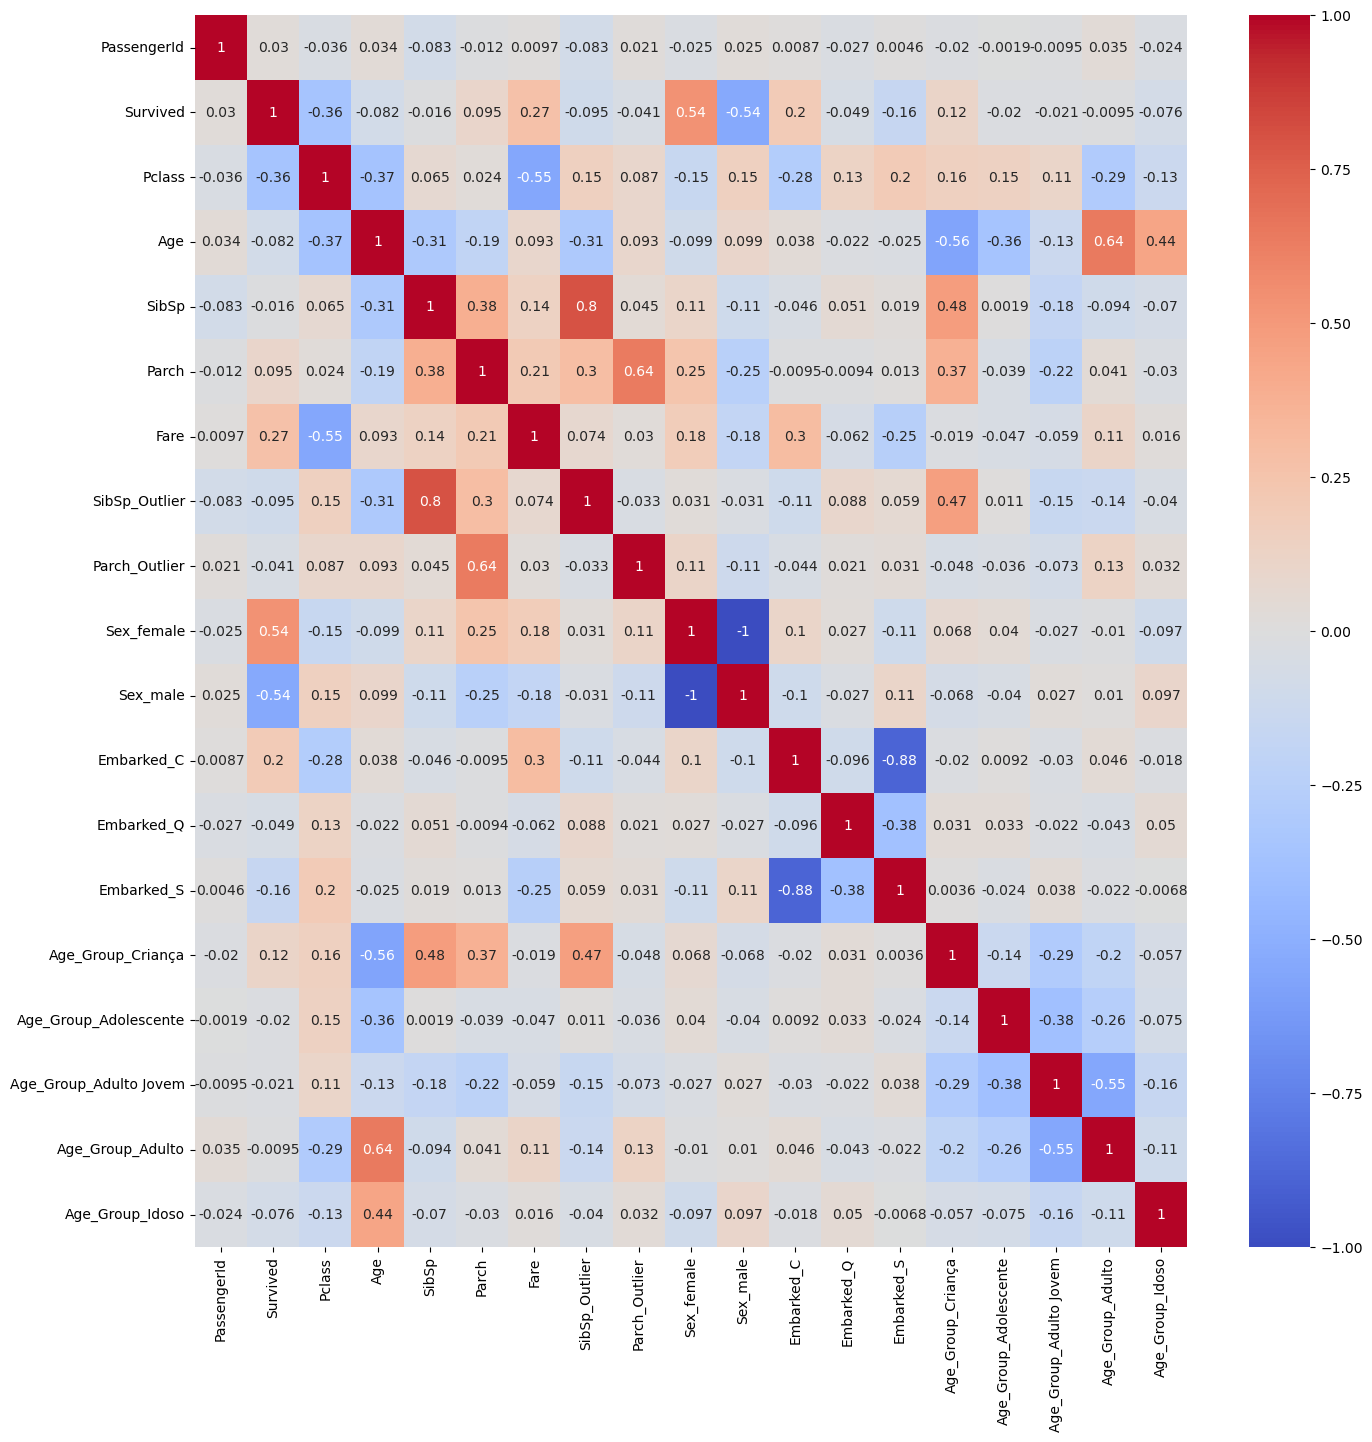

In [131]:
plt.figure(figsize=(16, 16))
sns.heatmap(data[features_num].corr(), cmap='coolwarm', annot=True)
plt.show()

### 6. Insights e Conclusões

- Foi possível observar que passageiras mulheres e passageniros em geral da Pclass 1 foram os com maiores taxas de sobrevivência
- Estas 2 perfis de passageiros são influenciados por fatores como familiares presentes (Parch), o preço pago na passagem (Fare) e o local de embarque (Embarked_C)
- Após agrupar as idades foi possível verificar também uma preminancia de crianças (0 a 12 anos) como sobreviventes
